In [51]:
%load_ext autoreload
%autoreload 2
## packages
from src.ocr_base.text_processing.normlise_text import Normaliser
from src.ocr_base.display.display import Display
from src.ocr_base.accuracy.metric import Metric
from src.ocr_insurance_card.pipeline.load_data import *
from src.ocr_base.text_detection.gcv.bounding_poly import BoundingPoly as BP
from src.ocr_base.text_processing.match_inline_texts import MatchLine 
import pandas as pd
import cv2
from jupyter_helpers.namespace import NeatNamespace # package to summarise dictionaries into nice table view, syntax NeatNamespace(theDictionary)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## step-by-step

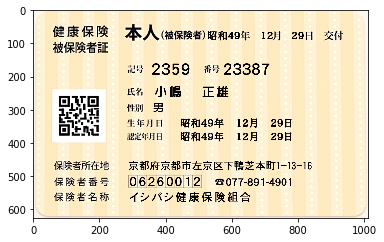

In [52]:
# test image
img_name = "01"
img_extension = ".jpg"
img_path = image_dir + "/" + img_name + img_extension
img = cv2.imread(img_path, 1)
Display.display_img_nb(img)

In [53]:
gcv_res_dict[img_name]

{'extension': '.jpg',
 'full_text': ['健康保険本人(被保険者) 昭和49年 12月29日 交付\n被保険者証\n記号 2359 番号 23387\n氏名 小嶋 正雄\n性別 男\n生年月日 昭和49年 12月29日\n認定年月日 昭和49年12月29日\nに\n保険者所在地\n保険者番号\n保険者名称\n京都府京都市左京区下鴨芝本町1-13-16\n06260012 8077-891-4901\nイシバシ健康保険組合\n',
  '健康保険本人',
  '(',
  '被保険者',
  ')',
  '昭和49年',
  '12月29日',
  '交付',
  '被保険者証',
  '記号',
  '2359',
  '番号',
  '23387',
  '氏名',
  '小嶋',
  '正雄',
  '性別',
  '男',
  '生年月日',
  '昭和49年',
  '12月29日',
  '認定年月日',
  '昭和49年12月29日',
  'に',
  '保険者所在地',
  '保険者番号',
  '保険者名称',
  '京都府京都市左京区下鴨芝本町1',
  '-',
  '13',
  '-',
  '16',
  '06260012',
  '8077',
  '-',
  '891',
  '-',
  '4901',
  'イシバシ健康保険組合'],
 'final_text': '健康保険本人(被保険者) 昭和49年 12月29日 交付\n被保険者証\n記号 2359 番号 23387\n氏名 小嶋 正雄\n性別 男\n生年月日 昭和49年 12月29日\n認定年月日 昭和49年12月29日\nに\n保険者所在地\n保険者番号\n保険者名称\n京都府京都市左京区下鴨芝本町1-13-16\n06260012 8077-891-4901\nイシバシ健康保険組合\n',
 'bouding_poly': ['[(59,40),(933,40),(933,585),(59,585)]',
  '[(61,40),(382,44),(381,92),(60,88)]',
  '[(387,45),(400,45),(399,92),(386,92)]',
  '[(401,45),(503,46),(502,93)

In [45]:
# # find all word that are in the same line from block words
# block_words = gcv_res_dict[img_name]["final_text"]
# element_words = gcv_res_dict[img_name]["full_text"][1:]
# element_words_bp = gcv_res_dict[img_name]["bouding_poly"][1:]
# # convert raw bp into array
# element_words_bp = BP.convert_to_array(element_words_bp)

# find bounding poly for the block of texts in the first and also the longest element in text_annotation response return from gcv
match_texts, match_bp = MatchLine.find_block_words_bp(gcv_res_dict[img_name])
match_texts

['健康保険本人 ( 被保険者 ) 昭和49年 12月29日 交付',
 '被保険者証',
 '記号 2359 番号 23387',
 '氏名 小嶋 正雄',
 '性別 男',
 '生年月日 昭和49年 12月29日',
 '認定年月日 昭和49年12月29日',
 'に',
 '保険者所在地',
 '保険者番号',
 '保険者名称',
 '京都府京都市左京区下鴨芝本町1 - 13 - 16',
 '06260012 8077 - 891 - 4901',
 'イシバシ健康保険組合']

The expected output for variable match_texts should be the same as the first and also the longest element in text_annotation response return from gcv, separated by `\n`

In [39]:
sep_texts = gcv_res_dict[img_name]["final_text"].split("\n")
sep_texts.remove('')
sep_texts

['健康保険本人(被保険者) 昭和49年 12月29日 交付',
 '被保険者証',
 '記号 2359 番号 23387',
 '氏名 小嶋 正雄',
 '性別 男',
 '生年月日 昭和49年 12月29日',
 '認定年月日 昭和49年12月29日',
 'に',
 '保険者所在地',
 '保険者番号',
 '保険者名称',
 '京都府京都市左京区下鴨芝本町1-13-16',
 '06260012 8077-891-4901',
 'イシバシ健康保険組合']

The expected result for match_bp, i.e the bounding polygon for each of the text in the block of text returned by gcv, is presented below

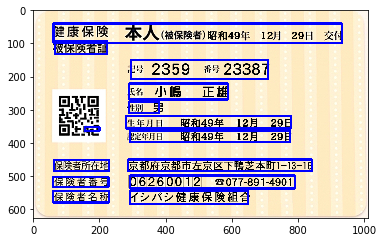

In [40]:
Display.draw_boxes(img, match_bp)

In [33]:
same_line_word_idx = []
for word in match_texts:
    tmp_same_line_word_idx = MatchLine.separate_by_distance(word_to_match=word, word_vector=match_texts, bps=match_bp)
#     print("same_line_word_idx", tmp_same_line_word_idx)
    sorted_idx = sorted(tmp_same_line_word_idx)
#     print("sorted_idx", sorted_idx)
    if sorted_idx not in same_line_word_idx:
        same_line_word_idx.append(sorted_idx)
same_line_word_idx

[[0], [1], [2], [3], [4], [5, 7], [6], [8, 11], [9, 12], [10, 13]]

In [34]:
same_line_texts = []
for idx in same_line_word_idx:
    tmp_idx = idx
    if len(tmp_idx) > 1:
        tmp_text = ""
        for value in tmp_idx:
            tmp_text = tmp_text + " " + sep_texts[value]
    else:
        tmp_text = sep_texts[tmp_idx[0]]
    same_line_texts.append(tmp_text)
same_line_texts

['健康保険本人(被保険者) 昭和49年 12月29日 交付',
 '被保険者証',
 '記号 2359 番号 23387',
 '氏名 小嶋 正雄',
 '性別 男',
 ' 生年月日 昭和49年 12月29日 に',
 '認定年月日 昭和49年12月29日',
 ' 保険者所在地 京都府京都市左京区下鴨芝本町1-13-16',
 ' 保険者番号 06260012 8077-891-4901',
 ' 保険者名称 イシバシ健康保険組合']

## wrap everything into one function

In [44]:
MatchLine.match_inline(gcv_res_dict[img_name])

['健康保険本人(被保険者) 昭和49年 12月29日 交付',
 '被保険者証',
 '記号 2359 番号 23387',
 '氏名 小嶋 正雄',
 '性別 男',
 ' 生年月日 昭和49年 12月29日 に',
 '認定年月日 昭和49年12月29日',
 ' 保険者所在地 京都府京都市左京区下鴨芝本町1-13-16',
 ' 保険者番号 06260012 8077-891-4901',
 ' 保険者名称 イシバシ健康保険組合']

In [50]:
MatchLine.match_inline(gcv_res_dict["03"])

['健康保険本人(被保険者) 昭和58年 8月 12日 交付',
 '被保険者証',
 '記号 1797 番号99664',
 '氏名 津村 利奈',
 '性別 女',
 '生年月日 昭和58年 17,8月 12日',
 '認定年月日 昭和58年 8月12日',
 ' 保険者所在地 三重県津市美里町桂畑1-1',
 ' 保険者番号 06240030 8059-631-6796',
 ' 保険者名称 ハラダ健康保険組合']